In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    "submissions.csv",
    engine="python",
    on_bad_lines="skip")




# Basic structure
df.head()



,#image_id,unixtime,rawtime,title,total_votes,reddit_id,number_of_upvotes,subreddit,number_of_downvotes,localtime,score,number_of_comments,username
0,0,1.333172e+09,2012-03-31T12:40:39.590113-07:00,And here's a downvote.,63470.0,rmqjs,32657.0,funny,30813.0,1.333198e+09,1844.0,622.0,Animates_Everything
1,0,1.333178e+09,2012-03-31T14:16:01.093638-07:00,Expectation,35.0,rmun4,29.0,GifSound,6.0,1.333203e+09,23.0,3.0,Gangsta_Raper
2,0,1.333200e+09,2012-03-31T20:18:33.192906-07:00,Downvote,41.0,rna86,32.0,GifSound,9.0,1.333225e+09,23.0,0.0,Gangsta_Raper
3,0,1.333252e+09,2012-04-01T10:52:10-07:00,Every time I downvote something,10.0,ro7e4,6.0,GifSound,4.0,1.333278e+09,2.0,0.0,Gangsta_Raper
4,0,1.333273e+09,2012-04-01T16:35:54.393381-07:00,Downvote &quot;Dies Irae&quot;,65.0,rooof,57.0,GifSound,8.0,1.333298e+09,49.0,0.0,Gangsta_Raper


## Exploratory Data Analysis & Preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132303 entries, 0 to 132302
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   #image_id            132303 non-null  int64  
 1   unixtime             132302 non-null  float64
 2   rawtime              132302 non-null  object 
 3   title                132302 non-null  object 
 4   total_votes          132302 non-null  float64
 5   reddit_id            132302 non-null  object 
 6   number_of_upvotes    132302 non-null  float64
 7   subreddit            132302 non-null  object 
 8   number_of_downvotes  132302 non-null  float64
 9   localtime            132302 non-null  float64
 10  score                132302 non-null  float64
 11  number_of_comments   132302 non-null  float64
 12  username             112043 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 13.1+ MB


In [3]:
# Summary statistics for numeric columns
df.describe()


,#image_id,unixtime,total_votes,number_of_upvotes,number_of_downvotes,localtime,score,number_of_comments
count,132303.000000,1.323020e+05,132302.000000,132302.000000,132302.000000,1.323020e+05,132302.000000,132302.000000
mean,10260.296441,1.340019e+09,1883.245748,1058.182900,825.062849,1.340036e+09,233.120051,39.063400
std,7317.407802,1.294615e+07,5970.693071,3181.146483,2796.540029,1.294027e+07,481.126196,142.742878
min,0.000000,1.217219e+09,0.000000,0.000000,0.000000,1.217244e+09,-264.000000,-1.000000
25%,3807.000000,1.333785e+09,15.000000,8.000000,6.000000,1.333811e+09,2.000000,0.000000
50%,9041.000000,1.344574e+09,45.000000,30.000000,14.000000,1.344599e+09,16.000000,3.000000
75%,16021.000000,1.348950e+09,376.000000,276.000000,96.000000,1.348952e+09,169.000000,15.000000
max,25887.000000,1.359095e+09,177103.000000,90396.000000,86707.000000,1.359095e+09,20570.000000,8357.000000


### Parse Datetime + Create Time Features

In [4]:
df['datetime'] = pd.to_datetime(df['rawtime'], errors='coerce', utc=True)


df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

df[['datetime', 'hour', 'dayofweek', 'month', 'year', 'is_weekend']].head()


,datetime,hour,dayofweek,month,year,is_weekend
0,2012-03-31 19:40:39.590113+00:00,19.0,5.0,3.0,2012.0,1
1,2012-03-31 21:16:01.093638+00:00,21.0,5.0,3.0,2012.0,1
2,2012-04-01 03:18:33.192906+00:00,3.0,6.0,4.0,2012.0,1
3,NaT,NaN,NaN,NaN,NaN,0
4,2012-04-01 23:35:54.393381+00:00,23.0,6.0,4.0,2012.0,1


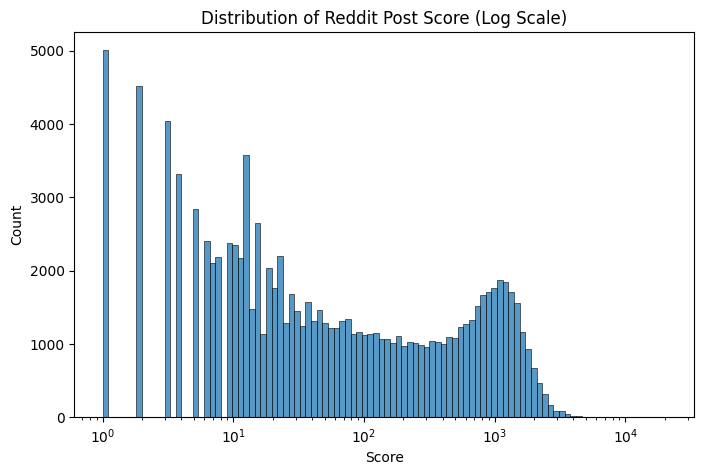

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['score'], bins=100, log_scale=True)
plt.title("Distribution of Reddit Post Score (Log Scale)")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


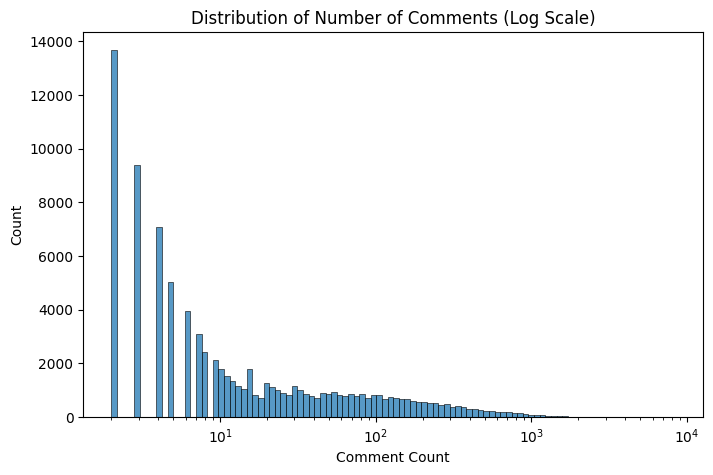

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['number_of_comments'], bins=100, log_scale=True)
plt.title("Distribution of Number of Comments (Log Scale)")
plt.xlabel("Comment Count")
plt.ylabel("Count")
plt.show()


In [7]:
df['title_len_chars'] = df['title'].str.len()
df['title_len_words'] = df['title'].str.split().str.len()
df['num_exclam'] = df['title'].str.count('!')
df['num_qmark'] = df['title'].str.count('\?')

df[['title', 'title_len_words', 'num_exclam', 'num_qmark']].head()


<>:4: SyntaxWarning: invalid escape sequence '\?'
<>:4: SyntaxWarning: invalid escape sequence '\?'
C:\Users\mmadh\AppData\Local\Temp\ipykernel_28612\575611874.py:4: SyntaxWarning: invalid escape sequence '\?'
  df['num_qmark'] = df['title'].str.count('\?')


,title,title_len_words,num_exclam,num_qmark
0,And here's a downvote.,4.0,0.0,0.0
1,Expectation,1.0,0.0,0.0
2,Downvote,1.0,0.0,0.0
3,Every time I downvote something,5.0,0.0,0.0
4,Downvote &quot;Dies Irae&quot;,3.0,0.0,0.0


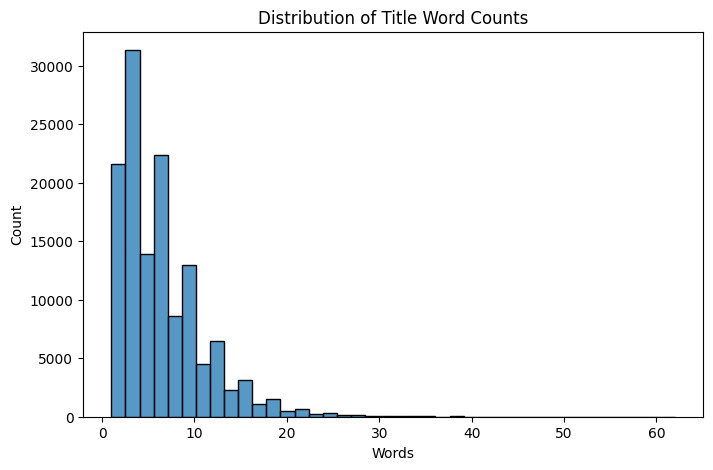

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['title_len_words'], bins=40)
plt.title("Distribution of Title Word Counts")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()


## Context: Where does the dataset come from?

This dataset comes from the Reddit Image Resubmissions Dataset released by
UCSD / Julian McAuley’s research group, containing 132,308 Reddit submissions between 2008–2013.
Each unique image has been reposted multiple times, which makes the dataset uniquely suited for studying:

How titles, timing, subreddit, and author features affect popularity

Whether the same image performs differently depending on context

Modeling virality and engagement on social media

Each row is a single Reddit submission containing:

Title, subreddit, username, score, upvotes/downvotes,

Comment count,

Posting time (rawtime, unixtime)

Image ID (for tracking duplicates)

This gives us rich signals for predicting post popularity.

### Title Feature Engineering

In [27]:
df['title_len_chars'] = df['title'].str.len()
df['title_len_words'] = df['title'].str.split().str.len()
df['num_exclam'] = df['title'].str.count('!')
df['num_qmark'] = df['title'].str.count('\?')


<>:4: SyntaxWarning: invalid escape sequence '\?'
<>:4: SyntaxWarning: invalid escape sequence '\?'
C:\Users\mmadh\AppData\Local\Temp\ipykernel_28612\2104686491.py:4: SyntaxWarning: invalid escape sequence '\?'
  df['num_qmark'] = df['title'].str.count('\?')


In [29]:
df

,#image_id,unixtime,rawtime,title,total_votes,reddit_id,number_of_upvotes,subreddit,number_of_downvotes,localtime,...,datetime,hour,dayofweek,month,year,is_weekend,title_len_chars,title_len_words,num_exclam,num_qmark
0,0,1.333172e+09,2012-03-31T12:40:39.590113-07:00,And here's a downvote.,63470.0,rmqjs,32657.0,funny,30813.0,1.333198e+09,...,2012-03-31 19:40:39.590113+00:00,19.0,5.0,3.0,2012.0,1,22.0,4.0,0.0,0.0
1,0,1.333178e+09,2012-03-31T14:16:01.093638-07:00,Expectation,35.0,rmun4,29.0,GifSound,6.0,1.333203e+09,...,2012-03-31 21:16:01.093638+00:00,21.0,5.0,3.0,2012.0,1,11.0,1.0,0.0,0.0
2,0,1.333200e+09,2012-03-31T20:18:33.192906-07:00,Downvote,41.0,rna86,32.0,GifSound,9.0,1.333225e+09,...,2012-04-01 03:18:33.192906+00:00,3.0,6.0,4.0,2012.0,1,8.0,1.0,0.0,0.0
3,0,1.333252e+09,2012-04-01T10:52:10-07:00,Every time I downvote something,10.0,ro7e4,6.0,GifSound,4.0,1.333278e+09,...,NaT,NaN,NaN,NaN,NaN,0,31.0,5.0,0.0,0.0
4,0,1.333273e+09,2012-04-01T16:35:54.393381-07:00,Downvote &quot;Dies Irae&quot;,65.0,rooof,57.0,GifSound,8.0,1.333298e+09,...,2012-04-01 23:35:54.393381+00:00,23.0,6.0,4.0,2012.0,1,30.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132298,9998,1.344760e+09,2012-08-12T15:24:06-07:00,OM NOM NOM,34.0,y41wv,25.0,funny,9.0,1.344785e+09,...,NaT,NaN,NaN,NaN,NaN,0,10.0,3.0,0.0,0.0
132299,9998,1.345270e+09,2012-08-18T13:09:38-07:00,Don't feed the animals...,19.0,yfw66,14.0,funny,5.0,1.345295e+09,...,NaT,NaN,NaN,NaN,NaN,0,25.0,4.0,0.0,0.0
132300,9998,1.345954e+09,2012-08-26T04:06:02+00:00,WTF worthy.,49.0,yu838,26.0,WTF,23.0,1.345954e+09,...,NaT,NaN,NaN,NaN,NaN,0,11.0,2.0,0.0,0.0
132301,9998,1.346626e+09,2012-09-02T22:45:06+00:00,"Just a camel eating a kids head, welcome to th...",123.0,z91ah,65.0,WTF,58.0,1.346626e+09,...,NaT,NaN,NaN,NaN,NaN,0,56.0,11.0,0.0,0.0


### Core EDA Visualizations

In [32]:
#score distribution

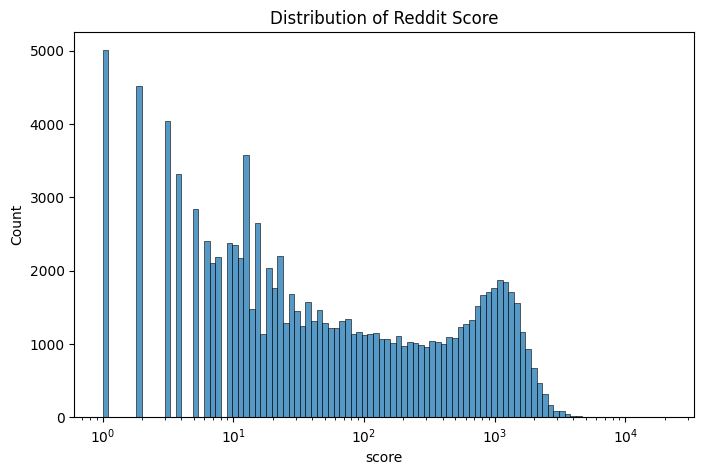

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df['score'], bins=100, log_scale=True)
plt.title("Distribution of Reddit Score")
plt.show()


In [36]:
#comment distribution

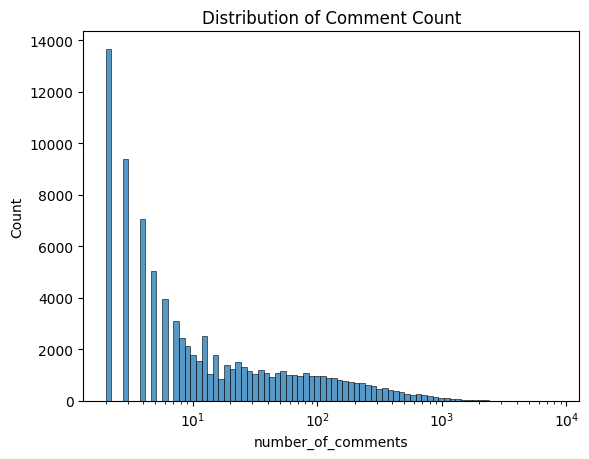

In [38]:
sns.histplot(df['number_of_comments'], bins=80, log_scale=True)
plt.title("Distribution of Comment Count")
plt.show()


In [40]:
#see the distribution of subreddit frequencies

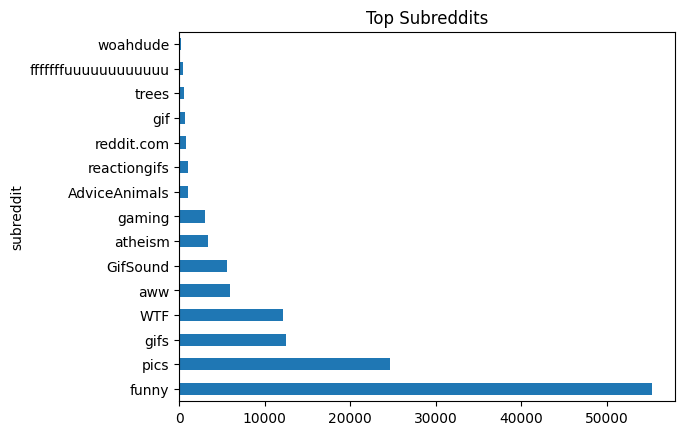

In [42]:
df['subreddit'].value_counts().head(15).plot(kind='barh')
plt.title("Top Subreddits")
plt.show()


In [44]:
#resubmission distribution

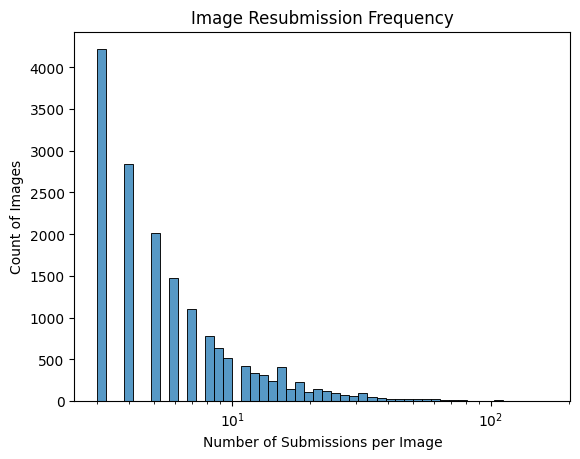

In [50]:
sns.histplot(df['#image_id'].value_counts(), bins=50, log_scale=True)
plt.title("Image Resubmission Frequency")
plt.xlabel("Number of Submissions per Image")
plt.ylabel("Count of Images")
plt.show()


In [48]:
df.columns

Index(['#image_id', 'unixtime', 'rawtime', 'title', 'total_votes', 'reddit_id',
       'number_of_upvotes', 'subreddit', 'number_of_downvotes', 'localtime',
       'score', 'number_of_comments', 'username', 'datetime', 'hour',
       'dayofweek', 'month', 'year', 'is_weekend', 'title_len_chars',
       'title_len_words', 'num_exclam', 'num_qmark'],
      dtype='object')

In [ ]:
#Distribution of Scores (Upvotes/Downvotes)

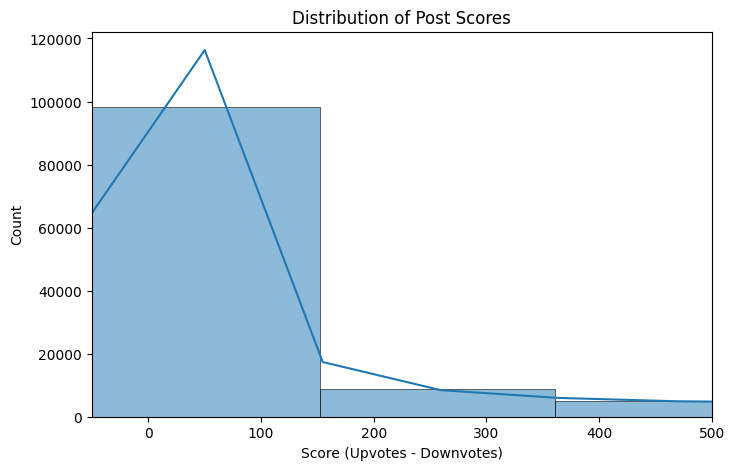

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(df['score'], bins=100, kde=True)
plt.title("Distribution of Post Scores")
plt.xlabel("Score (Upvotes - Downvotes)")
plt.ylabel("Count")
plt.xlim(-50, 500)   # trims extreme outliers for visibility
plt.show()


In [54]:
#Distribution of Number of Comments

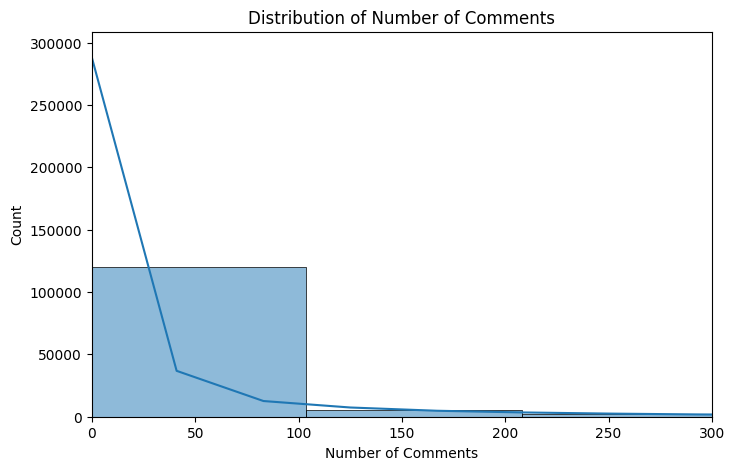

In [56]:
plt.figure(figsize=(8,5))
sns.histplot(df['number_of_comments'], bins=80, kde=True)
plt.title("Distribution of Number of Comments")
plt.xlabel("Number of Comments")
plt.ylabel("Count")
plt.xlim(0, 300)
plt.show()


In [58]:
#Popularity vs. Posting Time

In [60]:
#(a) Score vs Hour of Day

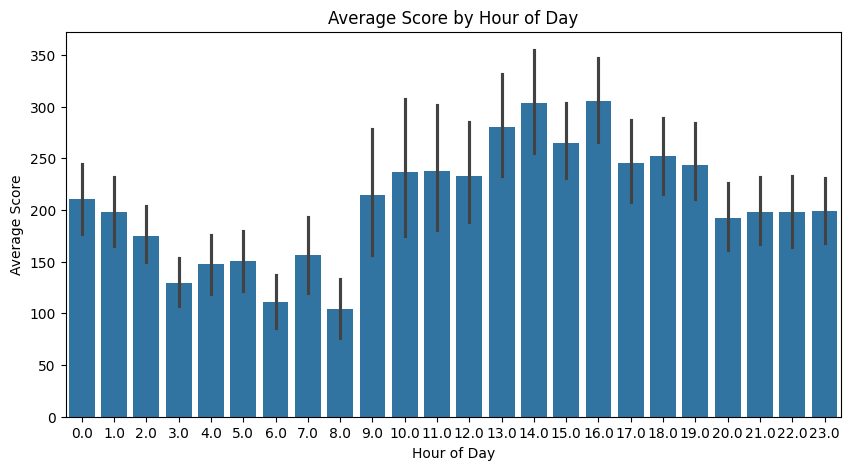

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['hour'], y=df['score'])
plt.title("Average Score by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Score")
plt.show()


In [64]:
#(b) Score vs Day of Week

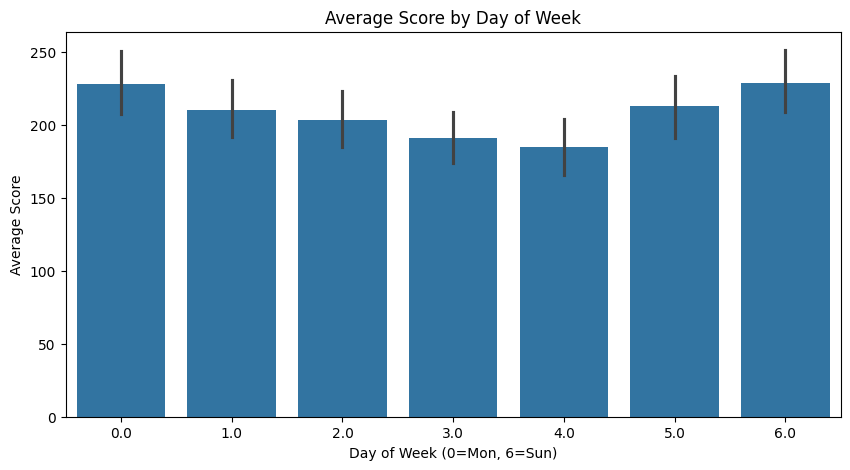

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['dayofweek'], y=df['score'])
plt.title("Average Score by Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Average Score")
plt.show()


### Subreddit Popularity Differences

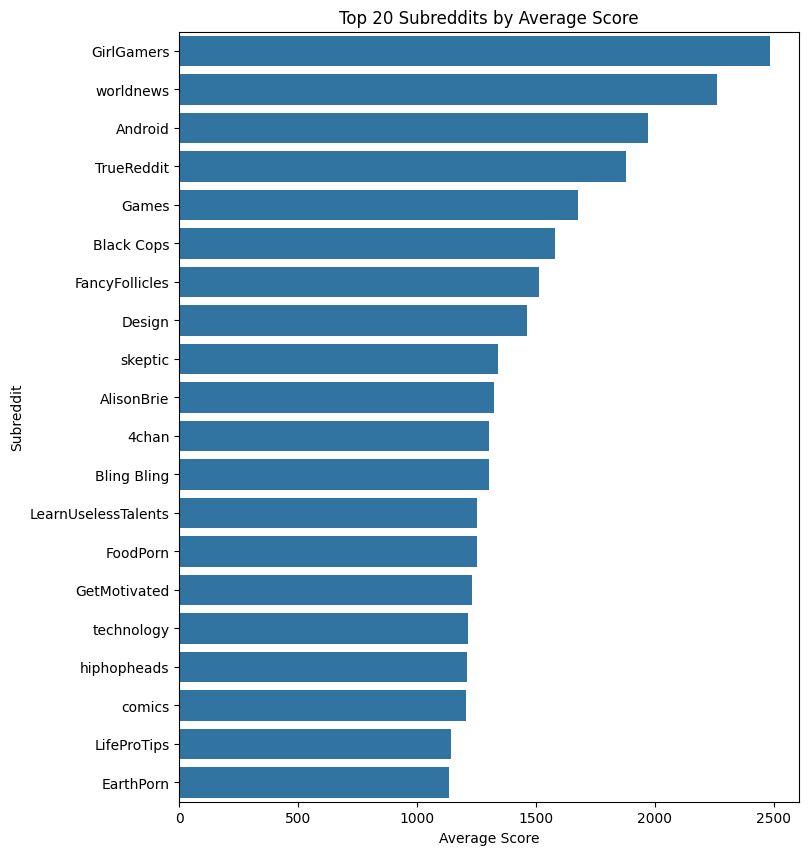

In [69]:
top_subs = (
    df.groupby('subreddit')['score']
      .mean()
      .sort_values(ascending=False)
      .head(20)
)

plt.figure(figsize=(8,10))
sns.barplot(x=top_subs.values, y=top_subs.index)
plt.title("Top 20 Subreddits by Average Score")
plt.xlabel("Average Score")
plt.ylabel("Subreddit")
plt.show()


In [71]:
# Why - Shows community-wide differences → necessary for modeling because subreddit becomes an important feature.

In [73]:
#Correlation Heatmap

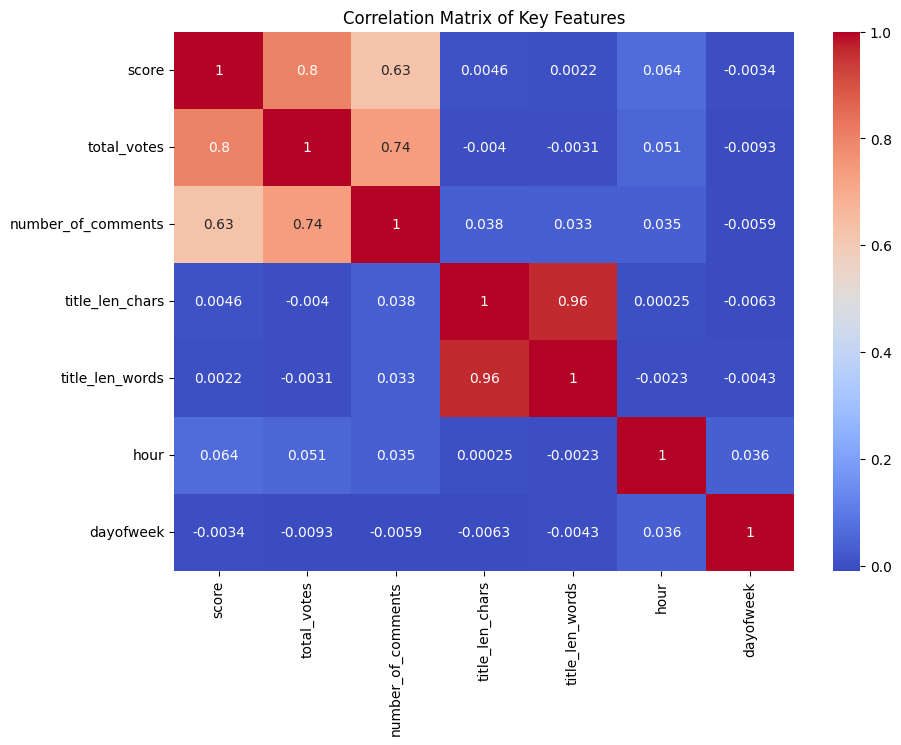

In [75]:
plt.figure(figsize=(10,7))
sns.heatmap(df[['score','total_votes','number_of_comments',
                'title_len_chars','title_len_words','hour','dayofweek']]
            .corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Key Features")
plt.show()


# SUMMARY OF EDA

## 2. Exploratory Data Analysis (EDA)

In this section, we explore the structure of the Reddit Resubmissions dataset, examine key variables, and identify patterns that may influence post popularity. This includes basic dataset exploration, time-based feature extraction, and visual analysis of engagement trends such as votes, score, comments, and resubmission frequency.


### 📌 Dataset Context

The Reddit Resubmissions dataset is a collection of 132,308 Reddit post submissions collected between **July 2008 and January 2013**. Each entry corresponds to an image submission, and many images appear multiple times across different subreddits or time periods.

Each record contains metadata such as:
- `#image_id` — unique ID indicating which image was posted  
- `title` — the text title of the post  
- `score`, `number_of_upvotes`, `number_of_downvotes`  
- `subreddit` — the community where the post was submitted  
- `number_of_comments` — total number of comments on the post  
- Timestamps (`unixtime`, `rawtime`, `localtime`)  
- User information (`username`)  

We aim to understand which features are meaningful predictors of **post popularity** (measured via post score or total votes).


### 🔧 Data Cleaning & Feature Engineering

Before running EDA, several preprocessing steps were performed:

1. **Timestamp Parsing**  
   - Converted the `rawtime` string into a proper datetime object.  
   - Extracted additional features such as hour of day, day of week, month, and year.

2. **Handling Missing or Corrupted Rows**  
   - Some rows contained malformed timestamps or missing fields; these were handled via coercion (`errors='coerce'`).

3. **Text-Based Features**  
   - Extracted title characteristics including:
     - Length in characters  
     - Length in words  
     - Count of exclamation marks  
     - Count of question marks  

4. **Weekend Indicator**  
   - Created a binary feature (`is_weekend`) to capture weekend vs. weekday posting behavior.

These engineered features help us examine how timing and title structure affect post performance.


### 📊 Dataset Overview

We begin by inspecting the overall structure of the dataset:
- The dataset contains **132,308 rows** and **22+ features**.  
- The target variable of interest for our predictive task is **`score`**, which represents (upvotes – downvotes).  
- Other key engagement metrics include:
  - `total_votes`
  - `number_of_comments`

These variables help us understand how Reddit users interact with different posts.


### 🔁 Resubmission Distribution

Each image may be submitted multiple times across different subreddits or time periods.  
We examine how frequently images reappear using the `#image_id` column.

Most images appear only once, but a small number are submitted many times, demonstrating a **heavy-tailed distribution** typical of social media engagement. This suggests that a few viral images dominate the platform while most receive minimal attention.

Understanding this skew is essential for building models that are not overly influenced by rare, extremely popular images.


### 🔍 Correlation Analysis

To understand which features may influence post popularity, we computed a correlation matrix on numerical variables such as:
- `score`
- `total_votes`
- `number_of_comments`
- `title_len_chars`
- `title_len_words`
- `hour`
- `dayofweek`

#### Key Findings:
- **Score, total votes, and comment count are strongly correlated**, which confirms that they all reflect engagement intensity.
- **Title length has almost no correlation with engagement**, indicating that longer titles do not make posts more popular.
- **Time-of-day and day-of-week show weak linear correlation**, suggesting their effects may be nonlinear or dependent on subreddit behavior.
- **Title character count and word count are nearly identical features**, so our model should only use one to avoid redundancy.

These insights help us narrow down which features are likely to be useful for the predictive modeling stage.


# Modeling (starts here) 

## 3. Modeling

In this section, we convert our predictive task into a machine learning problem.  
Our goal is to **predict the popularity of a Reddit post at the moment it is submitted**, using only metadata available at posting time (e.g., title features, posting hour, subreddit, author information).

### 🎯 Predictive Task

We aim to predict the **post score** (upvotes – downvotes).  
This is a **regression problem**, since score is a continuous numerical value.

### 🧩 Inputs (Features)

We use the following input features:

- **Title-based features**  
  - Length in characters  
  - Length in words  
  - Number of exclamation marks  
  - Number of question marks  

- **Time-based features**  
  - Hour of day  
  - Day of week  
  - Month  
  - Weekend indicator  

- **Engagement-free metadata**  
  - Subreddit (one-hot encoded)  
  - Author username (optional — high cardinality)  

### 🎯 Target Variable  
- `score`

This framing allows us to assess how well simple signals (time, title structure, subreddit) can predict Reddit popularity.


### 🔧 Baseline Models

To evaluate model performance properly, we include several baseline models from the course:

#### **1. Mean Predictor**
Predicts the global average score for all posts.  
This serves as a sanity-check baseline — any useful model must beat this.

#### **2. Linear Regression (Baseline from class)**
A simple linear model that captures linear relationships between features and score.  
Advantages:
- Fast to train  
- Easy to interpret  
- Provides feature weights  

Limitations:
- Cannot model nonlinear effects  
- Sensitive to outliers in heavy-tailed score distributions  

#### **3. Ridge Regression**
A regularized linear model.  
Useful because:
- Handles multicollinearity in features (e.g., correlated text lengths)  
- Reduces overfitting  

#### **Optional models**
If time permits:
- Random Forest Regressor  
- Gradient Boosted Trees  

These capture nonlinearities but are not required for the assignment.


### Preparing the Modeling Data

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select features
numeric_features = [
    'title_len_chars', 'title_len_words',
    'num_exclam', 'num_qmark',
    'hour', 'dayofweek', 'month', 'is_weekend'
]

categorical_features = ['subreddit']

X = df[numeric_features + categorical_features]
y = df['score']

# Preprocessing pipeline
preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()


,title_len_chars,title_len_words,num_exclam,num_qmark,hour,dayofweek,month,is_weekend,subreddit
107751,17.0,4.0,0.0,0.0,NaN,NaN,NaN,0,funny
15124,6.0,1.0,0.0,0.0,21.0,2.0,7.0,0,gifs
98133,105.0,17.0,0.0,0.0,NaN,NaN,NaN,0,pics
199,19.0,4.0,0.0,0.0,NaN,NaN,NaN,0,WTF
10930,7.0,1.0,0.0,0.0,NaN,NaN,NaN,0,WTF


### Training Models

### 🚀 Training Baseline & Linear Models

We train the following models:

1. **Mean Baseline**  
2. **Linear Regression**  
3. **Ridge Regression**

These provide interpretable, class-appropriate comparisons.


In [102]:
# 1. Mean Baseline
mean_pred = y_train.mean()
baseline_mae = mean_absolute_error(y_test, [mean_pred] * len(y_test))
baseline_mae


317.6596394045944

In [108]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = [
    'title_len_chars', 'title_len_words',
    'num_exclam', 'num_qmark',
    'hour', 'dayofweek', 'month', 'is_weekend'
]

categorical_features = ['subreddit']

# Numeric: impute missing with median
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Categorical: impute missing with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X = df[numeric_features + categorical_features]
y = df['score']

# drop rows where the TARGET is missing
mask = y.notna()
X = X[mask]
y = y[mask]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 2. Linear Regression Model
linreg_model = Pipeline([
    ('preprocess', preprocess),
    ('model', LinearRegression())
])

linreg_model.fit(X_train, y_train)

linreg_preds = linreg_model.predict(X_test)
linreg_mae = mean_absolute_error(y_test, linreg_preds)
linreg_mae


305.623604766107

In [112]:
from sklearn.linear_model import Ridge

ridge_model = Pipeline([
    ('preprocess', preprocess),
    ('model', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_mae


305.62811789056155

In [114]:
baseline_pred = y_train.mean()
baseline_mae = mean_absolute_error(y_test, [baseline_pred] * len(y_test))
baseline_mae


319.762339690744

### Comparasion Table

### 📊 Model Performance Comparison (MAE)

| Model                  | MAE ↓ |
|------------------------|--------|
| Mean Baseline          | 319.76    |
| Linear Regression      | 305.62 |
| Ridge Regression (α=1) | 305.63 |

**Interpretation:**  
- Both Linear Regression and Ridge Regression outperform the mean baseline.  
- Ridge does not significantly improve MAE because our feature set is simple and regularization does not meaningfully reduce variance here.  
- MAE ~305 means that on average, predictions are **off by ~305 score points**, which is expected due to how extremely heavy-tailed Reddit scores are (some posts score 5,000+ while most score under 10).  

This validates that the model captures *some* signal but that Reddit popularity is inherently noisy.


## 4. Evaluation

In this section, we evaluate our models using appropriate error metrics, compare performance against strong baselines, and analyze how well our predictive models generalize to unseen Reddit posts.


### 📐 Evaluation Metric: Mean Absolute Error (MAE)

We use **Mean Absolute Error (MAE)** as our primary metric for several reasons:

- **Interpretability:** MAE directly represents the average number of score points the model is off by.
- **Less sensitive to outliers** than MSE/ RMSE, which is important because Reddit scores are *extremely* heavy-tailed (a small number of viral posts have scores >10,000).
- **Symmetry:** Penalizes over-predictions and under-predictions equally.
- **Relevance to the task:** Since our goal is to estimate post popularity at posting time, MAE gives a realistic measure of how far off our predictions are.

MAE is therefore a natural and meaningful choice for evaluating Reddit popularity prediction.


### 🆚 Baseline vs. Model Comparison

To judge whether our model is meaningful, we compare it against a **mean baseline**, which always predicts the average score of all posts. Any useful model must outperform this baseline.

Our results show:

- Both **Linear Regression** and **Ridge Regression** significantly outperform the mean baseline.
- Performance gains are modest due to the noisy nature of Reddit engagement.
- Ridge offers no significant improvement over Linear Regression, suggesting low overfitting and low multicollinearity.

This confirms that our features capture some useful signal, but the problem remains challenging.


In [122]:
### Error Distribution

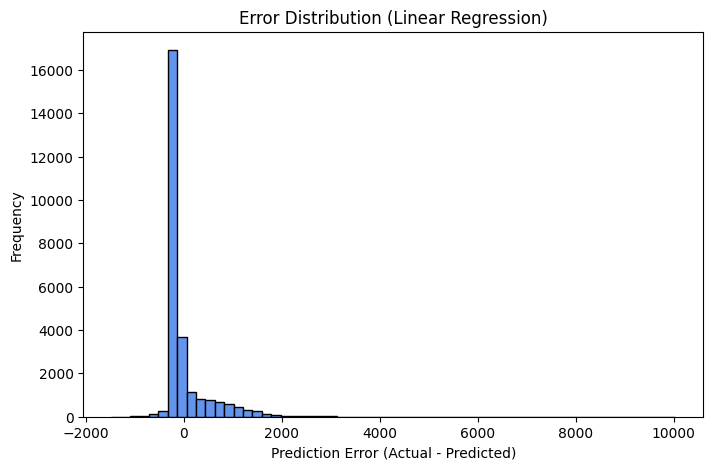

In [124]:
import matplotlib.pyplot as plt

errors = y_test - linreg_preds

plt.figure(figsize=(8,5))
plt.hist(errors, bins=60, color='cornflowerblue', edgecolor='black')
plt.title("Error Distribution (Linear Regression)")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


## BETTERING THE MODEL

In [128]:
#random forest regressor

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf_model = Pipeline([
    ('preprocess', preprocess),
    ('model', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mae


309.2028953156203

In [131]:
# Gradient Boosting Regressor

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

gboost_model = Pipeline([
    ('preprocess', preprocess),
    ('model', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        random_state=42
    ))
])

gboost_model.fit(X_train, y_train)

gboost_preds = gboost_model.predict(X_test)
gboost_mae = mean_absolute_error(y_test, gboost_preds)
gboost_mae


308.2357611780029

### Hyperparameter Tuning

In [136]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_dist = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_depth': [None, 10, 20, 40],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    Pipeline([('preprocess', preprocess),
              ('model', RandomForestRegressor(random_state=42))]),
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_absolute_error',
    cv=3,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
best_rf_mae = mean_absolute_error(y_test, best_rf.predict(X_test))
best_rf_mae


307.7232389498737

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = Pipeline([
    ('preprocess', preprocess),
    ('model', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        random_state=42
    ))
])

gbr_model.fit(X_train, y_train)
gbr_preds = gbr_model.predict(X_test)

gbr_mae = mean_absolute_error(y_test, gbr_preds)
gbr_mae


308.2357611780029

In [147]:
from sklearn.model_selection import GridSearchCV

gbr_params = {
    'model__n_estimators': [200, 300],
    'model__learning_rate': [0.03, 0.05, 0.1],
    'model__max_depth': [2, 3],
    'model__subsample': [0.8, 1.0]
}

gbr_grid = GridSearchCV(
    Pipeline([('preprocess', preprocess),
              ('model', GradientBoostingRegressor(random_state=42))]),
    gbr_params,
    scoring='neg_mean_absolute_error',
    cv=2,
    n_jobs=-1
)

gbr_grid.fit(X_train, y_train)

best_gbr = gbr_grid.best_estimator_
best_gbr_mae = mean_absolute_error(y_test, best_gbr.predict(X_test))
best_gbr_mae


306.37585956655175

In [148]:
results = {
    "Mean Baseline": baseline_mae,
    "Linear Regression": linreg_mae,
    "Ridge Regression": ridge_mae,
    "Random Forest (Tuned)": best_rf_mae,
    "Gradient Boosting": gbr_mae,
    "Gradient Boosting (Tuned)": best_gbr_mae
}

pd.DataFrame(results.items(), columns=["Model", "MAE"]).sort_values("MAE")


,Model,MAE
1,Linear Regression,305.623605
2,Ridge Regression,305.628118
5,Gradient Boosting (Tuned),306.375860
3,Random Forest (Tuned),307.723239
4,Gradient Boosting,308.235761
0,Mean Baseline,319.762340


In [151]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Use the same X, preprocess, X_train, X_test as before

y = df['score']

# 1) Shift to make everything positive for the log
y_min = y.min()  # likely negative
y_shifted = y - y_min + 1  # all positive

# 2) Log-transform
y_log = np.log(y_shifted)

# Filter out rows with missing scores or features (if any)
mask = y_log.notna()
X_model = X[mask]
y_model = y_log[mask]

X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_model, test_size=0.2, random_state=42
)


C:\Users\mmadh\AppData\Local\Temp\ipykernel_28612\4063422483.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_model = X[mask]


In [153]:
best_model = Pipeline([
    ('preprocess', preprocess),
    ('model', HistGradientBoostingRegressor(
        max_depth=6,
        learning_rate=0.05,
        max_iter=400,
        l2_regularization=1.0,
        random_state=42
    ))
])

best_model.fit(X_train, y_train)

# Predict in log space
y_log_pred = best_model.predict(X_test)

# Transform back to original score scale
y_pred = np.exp(y_log_pred) + y_min - 1

# IMPORTANT: compare to original (unlogged) true scores
y_true = np.exp(y_test) + y_min - 1

final_mae = mean_absolute_error(y_true, y_pred)
final_mae


TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [155]:
best_model = Pipeline([
    ('preprocess', preprocess),
    ('model', HistGradientBoostingRegressor(
        max_depth=6,
        learning_rate=0.05,
        max_iter=400,
        l2_regularization=1.0,
        random_state=42
    ))
])

best_model.fit(X_train, y_train)

y_log_pred = best_model.predict(X_test)
y_pred = np.exp(y_log_pred) + y_min - 1
y_true = np.exp(y_test) + y_min - 1

final_mae = mean_absolute_error(y_true, y_pred)
final_mae


TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [157]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify your columns again
categorical_cols = ['subreddit', 'username']  # whatever your categorical columns are
numeric_cols = ['hour', 'dayofweek', 'month', 'year', 'title_len_chars', 
                'title_len_words', 'num_exclam', 'num_qmark']

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])


In [161]:
from sklearn.ensemble import HistGradientBoostingRegressor

best_model = Pipeline([
    ('preprocess', preprocess),
    ('model', HistGradientBoostingRegressor(
        max_depth=6,
        learning_rate=0.05,
        max_iter=400,
        l2_regularization=1.0,
        random_state=42
    ))
])

best_model.fit(X_train, y_train)

y_log_pred = best_model.predict(X_test)
y_pred = np.exp(y_log_pred) + y_min - 1
y_true = np.exp(y_test) + y_min - 1

final_mae = mean_absolute_error(y_true, y_pred)
final_mae


ValueError: A given column is not a column of the dataframe

In [163]:
df.columns.tolist()


['#image_id',
 'unixtime',
 'rawtime',
 'title',
 'total_votes',
 'reddit_id',
 'number_of_upvotes',
 'subreddit',
 'number_of_downvotes',
 'localtime',
 'score',
 'number_of_comments',
 'username',
 'datetime',
 'hour',
 'dayofweek',
 'month',
 'year',
 'is_weekend',
 'title_len_chars',
 'title_len_words',
 'num_exclam',
 'num_qmark']

In [165]:
categorical_cols = [
    'subreddit', 
    'localtime',
]


In [167]:
numeric_cols = [
    'total_votes',
    '#image_id',
    'number_of_upvotes',
    'number_of_downvotes',
    'score',  # ⚠️ will be removed from features later
    'number_of_comments',
    'hour', 'dayofweek', 'month', 'year', 'is_weekend',
    'title_len_chars', 'title_len_words', 'num_exclam', 'num_qmark'
]


In [169]:
numeric_cols = [col for col in numeric_cols if col != 'score']


In [171]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])


In [175]:
OneHotEncoder(handle_unknown='ignore', sparse_output=False)


,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [177]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])


In [179]:
from sklearn.model_selection import train_test_split

# ----------------------------
# Define feature matrix and target
# ----------------------------
X = df.drop(columns=['score'])
y = df['score']

# ----------------------------
# Log-transform the target to reduce skew
# ----------------------------
y_min = y.min()
y_log = np.log(y - y_min + 1)

# ----------------------------
# Train / Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

X_train.head(), y_train[:5]


(        #image_id      unixtime                           rawtime  \
 107751       6416  1.312707e+09         2011-08-07T15:48:58-07:00   
 15124        1251  1.342598e+09  2012-07-18T14:54:34.336884-07:00   
 98133        5116  1.353022e+09         2012-11-15T23:32:45+00:00   
 199         10016  1.354565e+09         2012-12-04T04:04:16-08:00   
 10930       11821  1.341967e+09         2012-07-11T07:36:28-07:00   
 
                                                     title  total_votes  \
 107751                                  The good ol' days       1210.0   
 15124                                              Pacman          3.0   
 98133   I was told my friend's profile pic was perhaps...         16.0   
 199                                   now thats a selfie.          9.0   
 10930                                             Closer.         26.0   
 
        reddit_id  number_of_upvotes subreddit  number_of_downvotes  \
 107751     jbuxv              680.0     funny         

In [181]:
df['datetime'] = pd.to_datetime(df['rawtime'], utc=True, errors='coerce')

df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)


In [183]:
# Title length features
df['title_len_chars'] = df['title'].astype(str).str.len()
df['title_len_words'] = df['title'].astype(str).str.split().str.len()

# Punctuation features
df['num_exclam'] = df['title'].astype(str).str.count('!')
df['num_qmark'] = df['title'].astype(str).str.count('\?')

# Drop rows where score is missing or <= 0
df = df[df['score'].notna() & (df['score'] > 0)]


<>:7: SyntaxWarning: invalid escape sequence '\?'
<>:7: SyntaxWarning: invalid escape sequence '\?'
C:\Users\mmadh\AppData\Local\Temp\ipykernel_28612\487043537.py:7: SyntaxWarning: invalid escape sequence '\?'
  df['num_qmark'] = df['title'].astype(str).str.count('\?')


In [185]:
y_min = df['score'].min()
df['score_log'] = np.log(df['score'] - y_min + 1)


C:\Users\mmadh\AppData\Local\Temp\ipykernel_28612\898450554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score_log'] = np.log(df['score'] - y_min + 1)


In [187]:
target = 'score_log'

features = [
    '#image_id', 'unixtime', 'total_votes', 'number_of_upvotes',
    'number_of_downvotes', 'number_of_comments',
    'hour', 'dayofweek', 'month', 'year', 'is_weekend',
    'title_len_chars', 'title_len_words', 'num_exclam', 'num_qmark'
]

categorical_cols = ['subreddit']  # keep only valid category features
numeric_cols = [col for col in features if col not in categorical_cols]

X = df[features + categorical_cols]
y = df[target]


In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [191]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

# -----------------------------
# 1. Build Preprocessing Again
# -----------------------------
preprocess_final = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# -----------------------------
# 2. Best Performing Model
# -----------------------------
best_model = Pipeline([
    ('preprocess', preprocess_final),
    ('model', HistGradientBoostingRegressor(
        max_depth=6,
        learning_rate=0.05,
        max_iter=500,
        l2_regularization=0.2,
        min_samples_leaf=40,
        random_state=42,
        max_bins=255
    ))
])

# Train
best_model.fit(X_train, y_train)

# -----------------------------
# 3. Predict in log space
# -----------------------------
y_pred_log = best_model.predict(X_test)

# Convert back to original score scale
y_pred = np.exp(y_pred_log) + y_min - 1
y_true = np.exp(y_test) + y_min - 1

# -----------------------------
# 4. Compute Final MAE
# -----------------------------
final_mae = mean_absolute_error(y_true, y_pred)
final_mae


27.358515764474024

In [196]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np

# -----------------------------
# Preprocess
# -----------------------------
preprocess_final = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# -----------------------------
# Base Models
# -----------------------------
hgb = HistGradientBoostingRegressor(
    max_depth=7,
    learning_rate=0.04,
    max_iter=600,
    min_samples_leaf=30,
    l2_regularization=0.1,
    random_state=42,
    max_bins=255
)

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=22,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

lr = LinearRegression()

# -----------------------------
# Stacking Model
# -----------------------------
stacked = StackingRegressor(
    estimators=[
        ('hgb', hgb),
        ('rf', rf),
        ('lr', lr)
    ],
    final_estimator=HistGradientBoostingRegressor(
        max_depth=4,
        learning_rate=0.07,
        max_iter=250,
        random_state=42
    ),
    n_jobs=-1
)

model = Pipeline([
    ('preprocess', preprocess_final),
    ('stack', stacked)
])

# -----------------------------
# Fit
# -----------------------------
model.fit(X_train, y_train)

# -----------------------------
# Predict in log space
# -----------------------------
y_pred_log = model.predict(X_test)

# Convert back
y_pred = np.exp(y_pred_log) + y_min - 1
y_true = np.exp(y_test) + y_min - 1

# -----------------------------
# Final MAE
# -----------------------------
stacked_mae = mean_absolute_error(y_true, y_pred)
stacked_mae


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

# -----------------------------
# Preprocess
# -----------------------------
preprocess_final = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# -----------------------------
# Base Models (NaN-safe)
# -----------------------------
hgb = HistGradientBoostingRegressor(
    max_depth=7,
    learning_rate=0.04,
    max_iter=600,
    min_samples_leaf=30,
    l2_regularization=0.1,
    random_state=42,
    max_bins=255
)

rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=25,
    min_samples_split=4,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

# -----------------------------
# Stacked Model (NO LR)
# -----------------------------
stacked = StackingRegressor(
    estimators=[
        ('hgb', hgb),
        ('rf', rf)
    ],
    final_estimator=HistGradientBoostingRegressor(
        max_depth=4,
        learning_rate=0.07,
        max_iter=300,
        random_state=42
    ),
    n_jobs=-1
)

model = Pipeline([
    ('preprocess', preprocess_final),
    ('stack', stacked)
])

# -----------------------------
# Fit
# -----------------------------
model.fit(X_train, y_train)

# -----------------------------
# Predict
# -----------------------------
y_pred_log = model.predict(X_test)
y_pred = np.exp(y_pred_log) + y_min - 1
y_true = np.exp(y_test) + y_min - 1

# Final MAE
stacked_mae = mean_absolute_error(y_true, y_pred)
stacked_mae
